This code is originally from https://github.com/leafinity/keras_ganomaly

In [ ]:
from keras import layers
import keras
import keras.backend as K

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/5wHuESkUVNTceToRlTEQigSA6uvSItWcBzrThgWCIuK_-Hzxzoy2nLM


# Models

In [ ]:
width = 128
height = 128
channels = 1

## Generators Encoder


In [ ]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

# Encoder
x = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='conv_1', kernel_regularizer = 'l2')(input_layer)
x = layers.LeakyReLU(name='leaky_1')(x)

x = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='conv_2', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_1')(x)
x = layers.LeakyReLU(name='leaky_2')(x)


x = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_3', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_2')(x)
x = layers.LeakyReLU(name='leaky_3')(x)


x = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_4', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_3')(x)
x = layers.LeakyReLU(name='leaky_4')(x)

x = layers.GlobalAveragePooling2D(name='g_encoder_output')(x)

g_e = keras.models.Model(inputs=input_layer, outputs=x)

g_e.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 128, 128, 32)      832       
_________________________________________________________________
leaky_1 (LeakyReLU)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 64, 64, 64)        18496     
_________________________________________________________________
norm_1 (BatchNormalization)  (None, 64, 64, 64)        256       
_________________________________________________________________
leaky_2 (LeakyReLU)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 32, 32, 128)      

## Generator

In [ ]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

x = g_e(input_layer)

y = layers.Dense(width * width * 2, name='dense')(x) # 2 = 128 / 8 / 8
y = layers.Reshape((width//8, width//8, 128), name='de_reshape')(y)

y = layers.Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', name='deconv_1', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_1')(y)

y = layers.Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', name='deconv_2', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_2')(y)

y = layers.Conv2DTranspose(32, (3,3), strides=(2,2), padding='same', name='deconv_3', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_3')(y)

y = layers.Conv2DTranspose(channels, (1, 1), strides=(1,1), padding='same', name='decoder_deconv_output', kernel_regularizer = 'l2', activation='tanh')(y)

g = keras.models.Model(inputs=input_layer, outputs=y)

g.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 128, 128, 1)]     0         
_________________________________________________________________
functional_1 (Functional)    (None, 128)               242048    
_________________________________________________________________
dense (Dense)                (None, 32768)             4227072   
_________________________________________________________________
de_reshape (Reshape)         (None, 16, 16, 128)       0         
_________________________________________________________________
deconv_1 (Conv2DTranspose)   (None, 32, 32, 128)       147584    
_________________________________________________________________
de_leaky_1 (LeakyReLU)       (None, 32, 32, 128)       0         
_________________________________________________________________
deconv_2 (Conv2DTranspose)   (None, 64, 64, 64)       

## Encoder

In [ ]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

z = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='encoder_conv_1', kernel_regularizer = 'l2')(input_layer)
z = layers.LeakyReLU()(z)

z = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='encoder_conv_2', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_1')(z)
z = layers.LeakyReLU()(z)


z = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='encoder_conv_3', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_2')(z)
z = layers.LeakyReLU()(z)

z = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_41', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_3')(z)
z = layers.LeakyReLU()(z)

z = layers.GlobalAveragePooling2D(name='encoder_output')(z)

encoder = keras.models.Model(input_layer, z)
encoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 128, 128, 1)]     0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 128, 128, 32)      832       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128, 128, 32)      0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 64, 64, 64)        18496     
_________________________________________________________________
encoder_norm_1 (BatchNormali (None, 64, 64, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
encoder_conv_3 (Conv2D)      (None, 32, 32, 128)      

## feature extractor

In [ ]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

f = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='f_conv_1', kernel_regularizer = 'l2')(input_layer)
f = layers.LeakyReLU(name='f_leaky_1')(f)

f = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='f_conv_2', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_1')(f)
f = layers.LeakyReLU(name='f_leaky_2')(f)


f = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='f_conv_3', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_2')(f)
f = layers.LeakyReLU(name='f_leaky_3')(f)


f = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='f_conv_4', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_3')(f)
f = layers.LeakyReLU(name='feature_output')(f)

feature_extractor = keras.models.Model(input_layer, f)

feature_extractor.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 128, 128, 1)]     0         
_________________________________________________________________
f_conv_1 (Conv2D)            (None, 128, 128, 32)      832       
_________________________________________________________________
f_leaky_1 (LeakyReLU)        (None, 128, 128, 32)      0         
_________________________________________________________________
f_conv_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
f_norm_1 (BatchNormalization (None, 64, 64, 64)        256       
_________________________________________________________________
f_leaky_2 (LeakyReLU)        (None, 64, 64, 64)        0         
_________________________________________________________________
f_conv_3 (Conv2D)            (None, 32, 32, 128)      

## gan trainer

In [ ]:
class AdvLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AdvLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori_feature = feature_extractor(x[0])
        gan_feature = feature_extractor(x[1])
        return K.mean(K.square(ori_feature - K.mean(gan_feature, axis=0)))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
class CntLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CntLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori = x[0]
        gan = x[1]
        return K.mean(K.abs(ori - gan))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
class EncLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(EncLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori = x[0]
        gan = x[1]
        return K.mean(K.square(g_e(ori) - encoder(gan)))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
# model for training
input_layer = layers.Input(name='input', shape=(height, width, channels))
gan = g(input_layer) # g(x)

adv_loss = AdvLoss(name='adv_loss')([input_layer, gan])
cnt_loss = CntLoss(name='cnt_loss')([input_layer, gan])
enc_loss = EncLoss(name='enc_loss')([input_layer, gan])

gan_trainer = keras.models.Model(input_layer, [adv_loss, cnt_loss, enc_loss])

# loss function
def loss(yt, yp):
    return yp

losses = {
    'adv_loss': loss,
    'cnt_loss': loss,
    'enc_loss': loss,
}

lossWeights = {'cnt_loss': 20.0, 'adv_loss': 1.0, 'enc_loss': 1.0}

# compile
gan_trainer.compile(optimizer = 'adam', loss=losses, loss_weights=lossWeights)

In [ ]:
gan_trainer.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
functional_3 (Functional)       (None, 128, 128, 1)  4708993     input[0][0]                      
__________________________________________________________________________________________________
adv_loss (AdvLoss)              ()                   0           input[0][0]                      
                                                                 functional_3[0][0]               
__________________________________________________________________________________________________
cnt_loss (CntLoss)              ()                   0           input[0][0]           

## discriminator

In [ ]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

f = feature_extractor(input_layer)

d = layers.GlobalAveragePooling2D(name='glb_avg')(f)
d = layers.Dense(1, activation='sigmoid', name='d_out')(d)
    
d = keras.models.Model(input_layer, d, name='vgg16-places365')
d.summary()

Model: "vgg16-places365"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 128, 128, 1)]     0         
_________________________________________________________________
functional_7 (Functional)    (None, 16, 16, 128)       242048    
_________________________________________________________________
glb_avg (GlobalAveragePoolin (None, 128)               0         
_________________________________________________________________
d_out (Dense)                (None, 1)                 129       
Total params: 242,177
Trainable params: 241,537
Non-trainable params: 640
_________________________________________________________________


In [ ]:
d.compile(optimizer='adam', loss='binary_crossentropy')

# Load Data

In [ ]:
def get_Path(rootdir,root):
    Path=[]
    i=0
    c=os.listdir(rootdir)
    # c.sort(key=lambda x:int(x[:(x.index('('))]) )
    for i in range(len(c)):
        currentPath=root+"/"
        currentPath=currentPath+c[i]
        Path.append(currentPath)
    return Path


In [ ]:
import os
Path_train= get_Path(r"/content/drive/My Drive/AUTproject/data/train1", "/content/drive/My Drive/AUTproject/data/train1")
Path_test1= get_Path(r"/content/drive/My Drive/AUTproject/data/test","/content/drive/My Drive/AUTproject/data/test")
Path_test0= get_Path(r"/content/drive/My Drive/AUTproject/data/test1", "/content/drive/My Drive/AUTproject/data/test1")

In [ ]:
import random 
dangerous=[]
for i in range(len(Path_test1)):
  term=[]
  term.append(Path_test1[i])
  term.append(1)
  dangerous.append(term)

safe=[]

for i in range(len(Path_test0)):
  term=[]
  term.append(Path_test0[i])
  term.append(0)
  safe.append(term)


test= safe+dangerous
random.shuffle(test)


Path_test=[]
label_test=[]
for i in range(len(test)):
  Path_test.append(test[i][0])
  label_test.append(test[i][1])


print("path", len(Path_test))
print("label", len(label_test))





path 31
label 31


In [ ]:
# from keras.datasets import mnist
# import cv2
# import numpy as np
# import glob

# x_train= np.zeros((len(Path_train),width, height ))
# x_test= np.zeros((len(Path_test),width, height ))
# y_train= np.zeros((len(Path_train),1 ))
# y_test= np.array(label_test)

# # training set 
# for i in range(len(Path_train)):
#   img = cv2.imread(Path_train[i], cv2.IMREAD_GRAYSCALE)
#   if type(img)== None: 
#     continue
#   else: 
#     resized= cv2.resize(img, (width, height))
#     x_train[i]= resized
#   if i %10==0:
#     print("ok{}".format(i))

# # test set

# for i in range(len(Path_test)):
#   img = cv2.imread(Path_test[i], cv2.IMREAD_GRAYSCALE)
#   if type(img)== None: 
#     continue
#   else: 
#     resized= cv2.resize(img, (width, height))
#     x_test[i]= resized
#   if i %10==0:
#     print("ok{}".format(i))



In [ ]:
# import pickle 
# f=open('/content/drive/My Drive/AUTproject/data/x_test.txt','wb')
# pickle.dump(x_test,f)
# f.close()

In [ ]:
# import pickle 
# f=open('/content/drive/My Drive/AUTproject/data/x_train.txt','wb')
# pickle.dump(x_train,f)
# f.close()

In [ ]:
import pickle
f=open('/content/drive/My Drive/AUTproject/data/x_test.txt','rb')
x_test=pickle.load(f)
f.close()

In [ ]:
import pickle
f=open('/content/drive/My Drive/AUTproject/data/x_train.txt','rb')
x_train=pickle.load(f)
f.close()

In [ ]:
import numpy as np
y_train= np.zeros((len(Path_train),1 ))
y_test= np.array(label_test)

In [ ]:
print(len(x_test))
print(y_test)

31
[1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1]


In [ ]:
from keras.datasets import mnist
import cv2
import numpy as np
import glob

# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_ok = x_train[y_train == 1] # 6742 筆
# x_test = x_test[(y_test == 7) | (y_test == 1)] # 1135 筆 "1", 1028 筆 "7"
# y_test = y_test[(y_test == 7) | (y_test == 1)]



x_ok= x_train
def reshape_x(x):
    new_x = np.empty((len(x), width, height))
    for i, e in enumerate(x):
        new_x[i] = cv2.resize(e, (width, height))
    return np.expand_dims(new_x, axis=-1) / 127 - 1
  
x_ok = reshape_x(x_ok)
x_test = reshape_x(x_test)

In [ ]:
x_ok.max()

1.0078740157480315

# Training

In [ ]:
niter = 2000
bz = 128

In [ ]:
def get_data_generator(data, batch_size=32):
    datalen = len(data)
    cnt = 0
    while True:
        idxes = np.arange(datalen)
        np.random.shuffle(idxes)
        cnt += 1
        for i in range(int(np.ceil(datalen/batch_size))):
            train_x = np.take(data, idxes[i*batch_size: (i+1) * batch_size], axis=0)
            y = np.ones(len(train_x))
            yield train_x, [y, y, y]

In [ ]:
train_data_generator = get_data_generator(x_ok, bz)

In [ ]:
for i in range(niter):
    
    ### get batch x, y ###
    x, y = train_data_generator.__next__()
        
    ### train disciminator ###
    d.trainable = True
        
    fake_x = g.predict(x)
        
    d_x = np.concatenate([x, fake_x], axis=0)
    d_y = np.concatenate([np.zeros(len(x)), np.ones(len(fake_x))], axis=0)
        
    d_loss = d.train_on_batch(d_x, d_y)

    ### train generator ###
    
    d.trainable = False        
    g_loss = gan_trainer.train_on_batch(x, y)
    
    if i % 50 == 0:
        print(f'niter: {i+1}, g_loss: {g_loss}, d_loss: {d_loss}')

niter: 1, g_loss: [9.838890075683594, 2.217165231704712, 0.3209880590438843, 0.1865716576576233], d_loss: 0.7340964078903198
niter: 51, g_loss: [7.012754440307617, 0.06700477004051208, 0.2971208095550537, 0.1466515064239502], d_loss: 0.3378226161003113
niter: 101, g_loss: [6.674918174743652, 0.004694780800491571, 0.290883332490921, 0.10687169432640076], d_loss: 0.22062604129314423
niter: 151, g_loss: [6.32699728012085, 0.03933004289865494, 0.2761775851249695, 0.08895598351955414], d_loss: 0.26237747073173523
niter: 201, g_loss: [6.007896423339844, 0.0626186653971672, 0.26202088594436646, 0.07895633578300476], d_loss: 0.19883422553539276
niter: 251, g_loss: [5.75806188583374, 0.08546384423971176, 0.2512568235397339, 0.06797324120998383], d_loss: 0.17990171909332275
niter: 301, g_loss: [5.558393478393555, 0.03203931450843811, 0.2462897002696991, 0.06041474640369415], d_loss: 0.13201989233493805
niter: 351, g_loss: [8.001968383789062, 2.4603803157806396, 0.24797941744327545, 0.05904791131

# Evaluation

In [ ]:
encoded = g_e.predict(x_test)
gan_x = g.predict(x_test)
encoded_gan = g_e.predict(gan_x)
score = np.sum(np.absolute(encoded - encoded_gan), axis=-1)
score = (score - np.min(score)) / (np.max(score) - np.min(score)) # map to 0~1

In [ ]:
print(score)

[0.3065566  0.17794855 0.06942222 0.08518356 0.2578239  0.2576311
 0.00110789 0.1131761  0.06671833 0.16562271 0.47384915 0.10500241
 0.36952257 1.         0.38067722 0.         0.13695902 0.12157694
 0.27072    0.05903341 0.12751801 0.08504149 0.13812672 0.1739077
 0.1293994  0.02673561 0.0975472  0.3096598  0.12312724 0.54242563
 0.14595829]


In [ ]:
c=['skyblue' if x == 1 else 'pink' for x in y_test]
print(len(y_test))

31


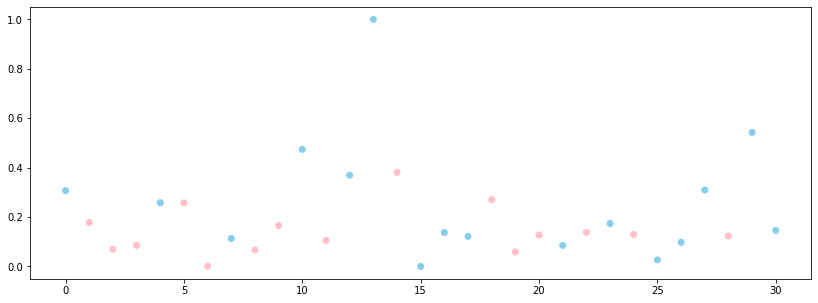

In [ ]:
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5
plt.scatter(range(len(x_test)), score, c=['skyblue' if x == 1 else 'pink' for x in y_test])


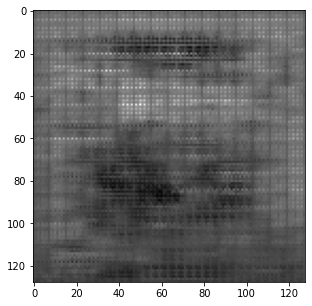

In [ ]:
i = 4 # or 1
image = np.reshape(gan_x[i:i+1], (width,height))
image = image * 127 + 127
plt.imshow(image.astype(np.uint8), cmap='gray')

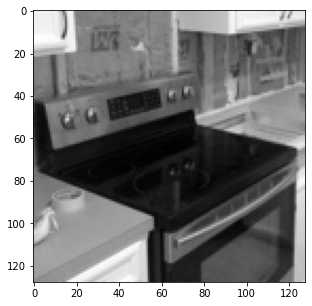

In [ ]:
image = np.reshape(x_test[i:i+1], (width,height))
image = image * 127 + 127
plt.imshow(image.astype(np.uint8), cmap='gray')